In [1]:
# Initial setup:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
%load_ext autoreload
%autoreload 1

#For fancy plots
import matplotlib
from matplotlib import pyplot as plt
matplotlib.rcParams['mathtext.fontset'] = 'cm'
matplotlib.rcParams['font.family'] = 'STIXGeneral'

import numpy as np
from numpy import random
#np.random.seed(42) # Set seed for reproducibility

from scipy.stats import  gamma
from scipy.special import erfcinv
from scipy.linalg import sqrtm

import getdist
from getdist import plots, MCSamples
getdist.chains.print_load_details = False

import git, os

In [2]:
def calculate_R_CM(vectors):
    num_vectors = len(vectors)
    R_CM = np.sum(vectors, axis=0) / num_vectors
    return R_CM

# Dataset A

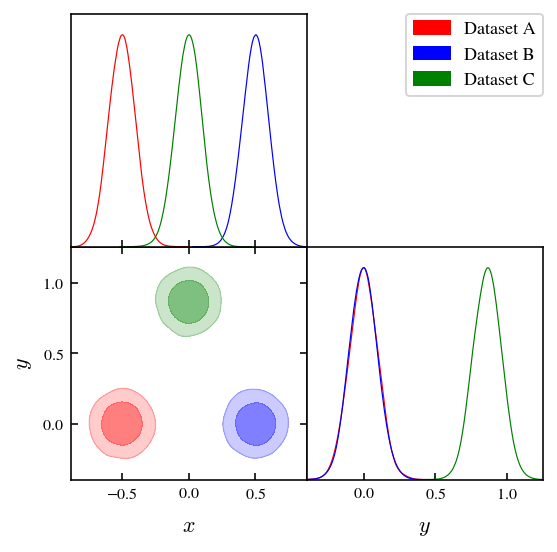

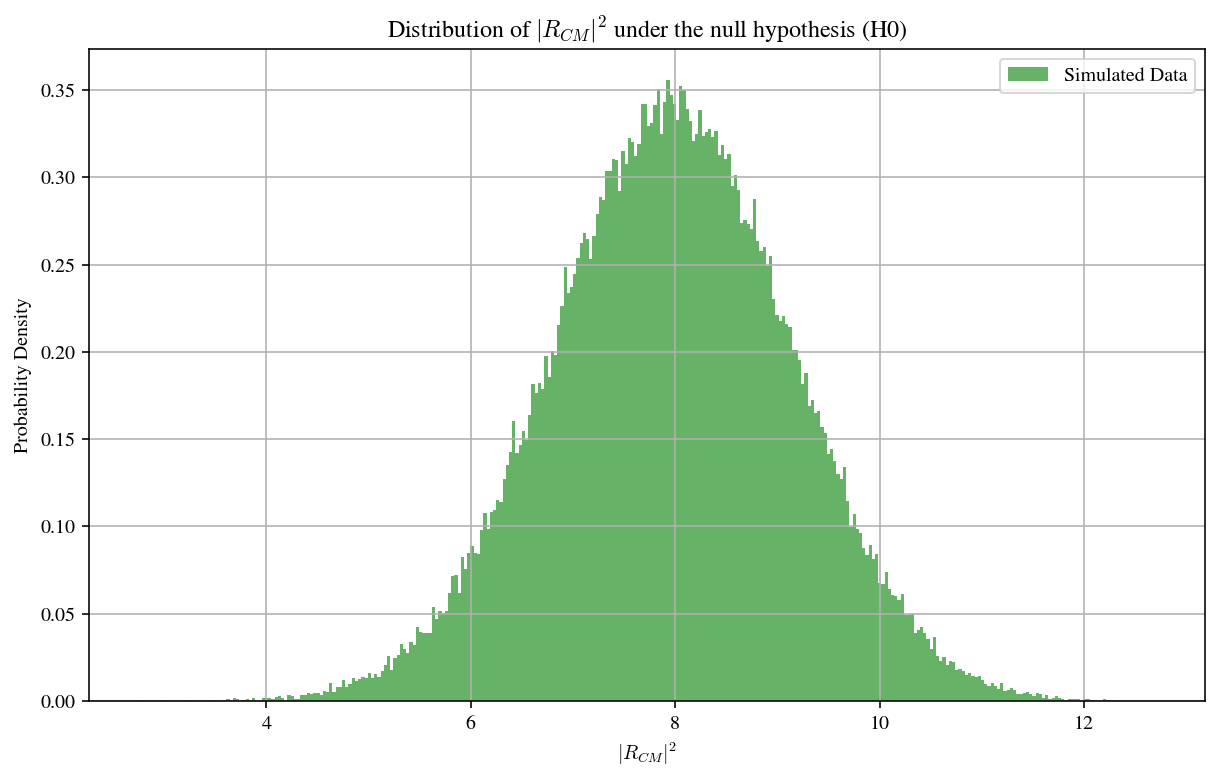

In [3]:
# Fixed constants
# Parameters
d = 2  # Dimension
N = 3 # Number of datasets
L = N*(N-1)/2  # Number of tension vectors
num_samples = int(1e5) # Number of samples

mean_A = np.array([-1/2., 0.]) 
mean_B = np.array([1/2, 0.])
mean_C = np.array([0, np.sqrt(3)/2.])

cov_A = np.array([[0.01, 0.], [0., 0.01]])
cov_B = cov_A.copy()
cov_C = cov_A.copy()

samps_A = np.random.multivariate_normal(mean_A, cov_A, size=10000)
samps_B = np.random.multivariate_normal(mean_B, cov_B, size=10000)
samps_C = np.random.multivariate_normal(mean_C, cov_C, size=10000)

names = ['x', 'y']
labels = ['x', 'y']

chain_A = MCSamples(samples=samps_A, names=names, labels=labels, label='Dataset A')
chain_B = MCSamples(samples=samps_B, names=names, labels=labels, label='Dataset B')
chain_C = MCSamples(samples=samps_C, names=names, labels=labels, label='Dataset C')

colors = ['red', 'blue', 'green']

g = plots.get_subplot_plotter()
g = plots.get_subplot_plotter()
g.triangle_plot([chain_A, chain_B, chain_C],\
                filled=True, contour_args={'alpha':0.5},\
                contour_colors=colors)

output = np.zeros((num_samples))
rand_mean_A = random.multivariate_normal(mean_A, cov_A, num_samples)
rand_mean_B = random.multivariate_normal(mean_B, cov_B, num_samples)
rand_mean_C = random.multivariate_normal(mean_C, cov_C, num_samples)

for i in range(num_samples):

    mean_A = rand_mean_A[i]
    mean_B = rand_mean_B[i]
    mean_C = rand_mean_C[i]

    cov_1 = cov_A + cov_B
    cov_2 = cov_A + cov_C
    cov_3 = cov_B + cov_C
    diff_mean_1 = mean_A - mean_B
    diff_mean_2 = mean_A - mean_C
    diff_mean_3 = mean_B - mean_C

    r_1 = np.dot(sqrtm(np.linalg.inv(cov_1)), diff_mean_1)
    r_2 = np.dot(sqrtm(np.linalg.inv(cov_2)), diff_mean_2)
    r_3 = np.dot(sqrtm(np.linalg.inv(cov_3)), diff_mean_3)

    # Compute some statistic values:
    vectors = np.array([r_1, r_2, r_3])
    R_CM = calculate_R_CM(vectors)
    PTE = gamma(a=d/2, scale=2/L).sf(np.linalg.norm(R_CM)**2)
    n_sigma_beta = np.sqrt(2)*erfcinv(PTE)
    output[i] = n_sigma_beta

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(output, bins=int(np.sqrt(len(output))), density=True, alpha=0.6, color='g', label='Simulated Data')
plt.title('Distribution of $|R_{CM}|^2$ under the null hypothesis (H0)')
plt.xlabel('$|R_{CM}|^2$')
plt.ylabel('Probability Density')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
# Fixed constants
# Parameters
d = 2  # Dimension
N = 2 # Number of datasets
L = N*(N-1)/2  # Number of tension vectors
num_samples = int(1e5) # Number of samples

mean_A = np.array([-1/2., 0.]) 
mean_B = np.array([1/2, 0.])
#mean_C = np.array([0, np.sqrt(3)/2.])

cov_A = np.array([[0.01, 0.], [0., 0.01]])
cov_B = cov_A.copy()
#cov_C = cov_A.copy()

samps_A = np.random.multivariate_normal(mean_A, cov_A, size=10000)
samps_B = np.random.multivariate_normal(mean_B, cov_B, size=10000)
#samps_C = np.random.multivariate_normal(mean_C, cov_C, size=10000)

names = ['x', 'y']
labels = ['x', 'y']

chain_A = MCSamples(samples=samps_A, names=names, labels=labels, label='Dataset A')
chain_B = MCSamples(samples=samps_B, names=names, labels=labels, label='Dataset B')
#chain_C = MCSamples(samples=samps_C, names=names, labels=labels, label='Dataset C')

colors = ['red', 'blue', 'green']

g = plots.get_subplot_plotter()
g = plots.get_subplot_plotter()
g.triangle_plot([chain_A, chain_B],\
                filled=True, contour_args={'alpha':0.5},\
                contour_colors=colors)

output = np.zeros((num_samples))
rand_mean_A = random.multivariate_normal(mean_A, cov_A, num_samples)
rand_mean_B = random.multivariate_normal(mean_B, cov_B, num_samples)
#rand_mean_C = random.multivariate_normal(mean_C, cov_C, num_samples)

for i in range(num_samples):

    mean_A = rand_mean_A[i]
    mean_B = rand_mean_B[i]
    #mean_C = rand_mean_C[i]

    cov_1 = cov_A + cov_B
    #cov_2 = cov_A + cov_C
    #cov_3 = cov_B + cov_C
    diff_mean_1 = mean_A - mean_B
    #diff_mean_2 = mean_A - mean_C
    #diff_mean_3 = mean_B - mean_C

    r_1 = np.dot(sqrtm(np.linalg.inv(cov_1)), diff_mean_1)
    #r_2 = np.dot(sqrtm(np.linalg.inv(cov_2)), diff_mean_2)
    #r_3 = np.dot(sqrtm(np.linalg.inv(cov_3)), diff_mean_3)

    # Compute some statistic values:
    #vectors = np.array([r_1, r_2, r_3])
    vectors = np.array([r_1])
    R_CM = calculate_R_CM(vectors)
    PTE = gamma(a=d/2, scale=2/L).sf(np.linalg.norm(R_CM)**2)
    n_sigma_beta = np.sqrt(2)*erfcinv(PTE)
    output[i] = n_sigma_beta

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(output, bins=int(np.sqrt(len(output))), density=True, alpha=0.6, color='g', label='Simulated Data')
plt.title('Distribution of $|R_{CM}|^2$ under the null hypothesis (H0)')
plt.xlabel('$|R_{CM}|^2$')
plt.ylabel('Probability Density')
plt.grid(True)
plt.legend()
plt.show()

# Dataset B

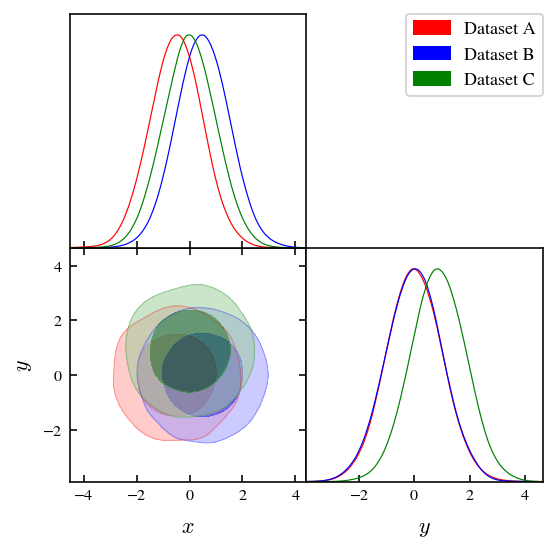

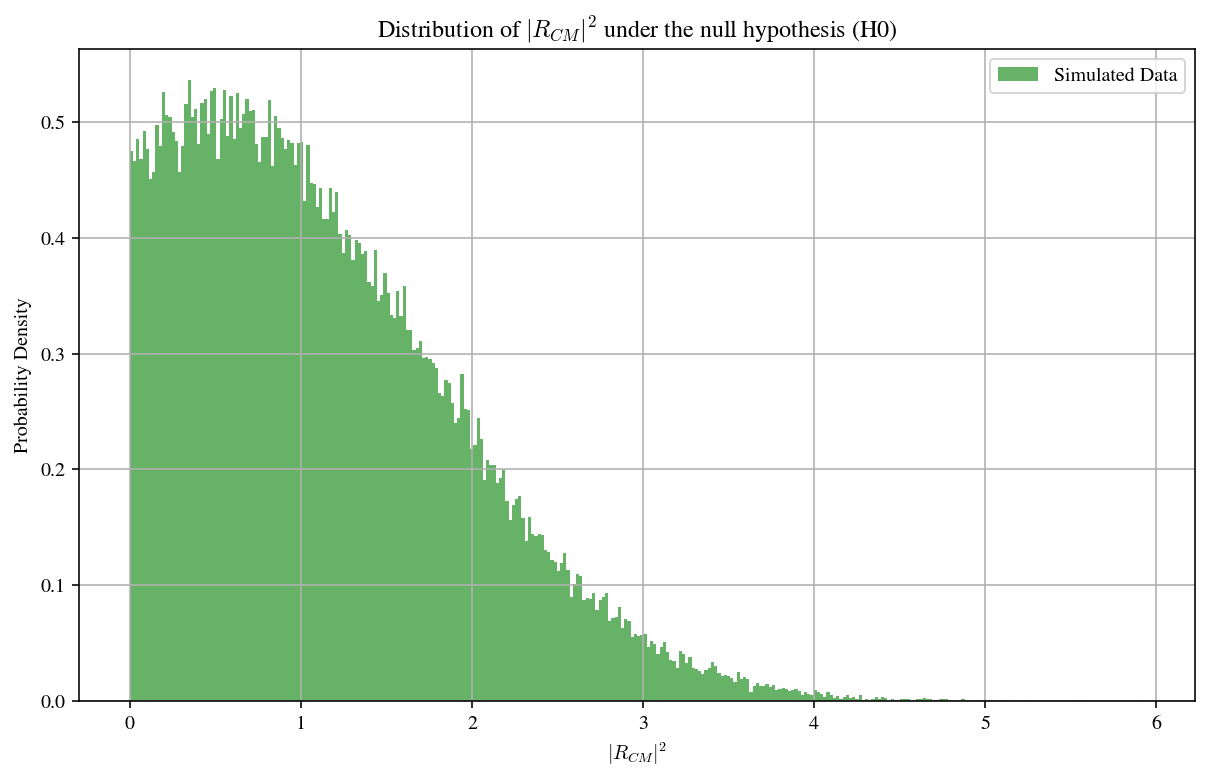

In [4]:
# Fixed constants
# Parameters
d = 2  # Dimension
N = 3 # Number of datasets
L = N*(N-1)/2  # Number of tension vectors
num_samples = int(1e5) # Number of samples

mean_A = np.array([-1/2., 0.]) 
mean_B = np.array([1/2, 0.])
mean_C = np.array([0, np.sqrt(3)/2.])

cov_A = 100*np.array([[0.01, 0.], [0., 0.01]])
cov_B = cov_A.copy()
cov_C = cov_A.copy()

samps_A = np.random.multivariate_normal(mean_A, cov_A, size=10000)
samps_B = np.random.multivariate_normal(mean_B, cov_B, size=10000)
samps_C = np.random.multivariate_normal(mean_C, cov_C, size=10000)

names = ['x', 'y']
labels = ['x', 'y']

chain_A = MCSamples(samples=samps_A, names=names, labels=labels, label='Dataset A')
chain_B = MCSamples(samples=samps_B, names=names, labels=labels, label='Dataset B')
chain_C = MCSamples(samples=samps_C, names=names, labels=labels, label='Dataset C')

colors = ['red', 'blue', 'green']

g = plots.get_subplot_plotter()
g = plots.get_subplot_plotter()
g.triangle_plot([chain_A, chain_B, chain_C],\
                filled=True, contour_args={'alpha':0.5},\
                contour_colors=colors)

output = np.zeros((num_samples))
rand_mean_A = random.multivariate_normal(mean_A, cov_A, num_samples)
rand_mean_B = random.multivariate_normal(mean_B, cov_B, num_samples)
rand_mean_C = random.multivariate_normal(mean_C, cov_C, num_samples)

for i in range(num_samples):

    mean_A = rand_mean_A[i]
    mean_B = rand_mean_B[i]
    mean_C = rand_mean_C[i]

    cov_1 = cov_A + cov_B
    cov_2 = cov_A + cov_C
    cov_3 = cov_B + cov_C
    diff_mean_1 = mean_A - mean_B
    diff_mean_2 = mean_A - mean_C
    diff_mean_3 = mean_B - mean_C

    r_1 = np.dot(sqrtm(np.linalg.inv(cov_1)), diff_mean_1)
    r_2 = np.dot(sqrtm(np.linalg.inv(cov_2)), diff_mean_2)
    r_3 = np.dot(sqrtm(np.linalg.inv(cov_3)), diff_mean_3)

    # Compute some statistic values:
    vectors = np.array([r_1, r_2, r_3])
    R_CM = calculate_R_CM(vectors)
    PTE = gamma(a=d/2, scale=2/L).sf(np.linalg.norm(R_CM)**2)
    n_sigma_beta = np.sqrt(2)*erfcinv(PTE)
    output[i] = n_sigma_beta

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(output, bins=int(np.sqrt(len(output))), density=True, alpha=0.6, color='g', label='Simulated Data')
plt.title('Distribution of $|R_{CM}|^2$ under the null hypothesis (H0)')
plt.xlabel('$|R_{CM}|^2$')
plt.ylabel('Probability Density')
plt.grid(True)
plt.legend()
plt.show()

# Dataset C

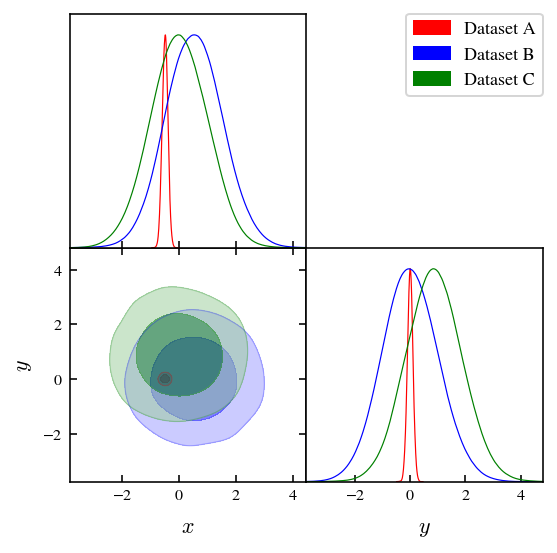

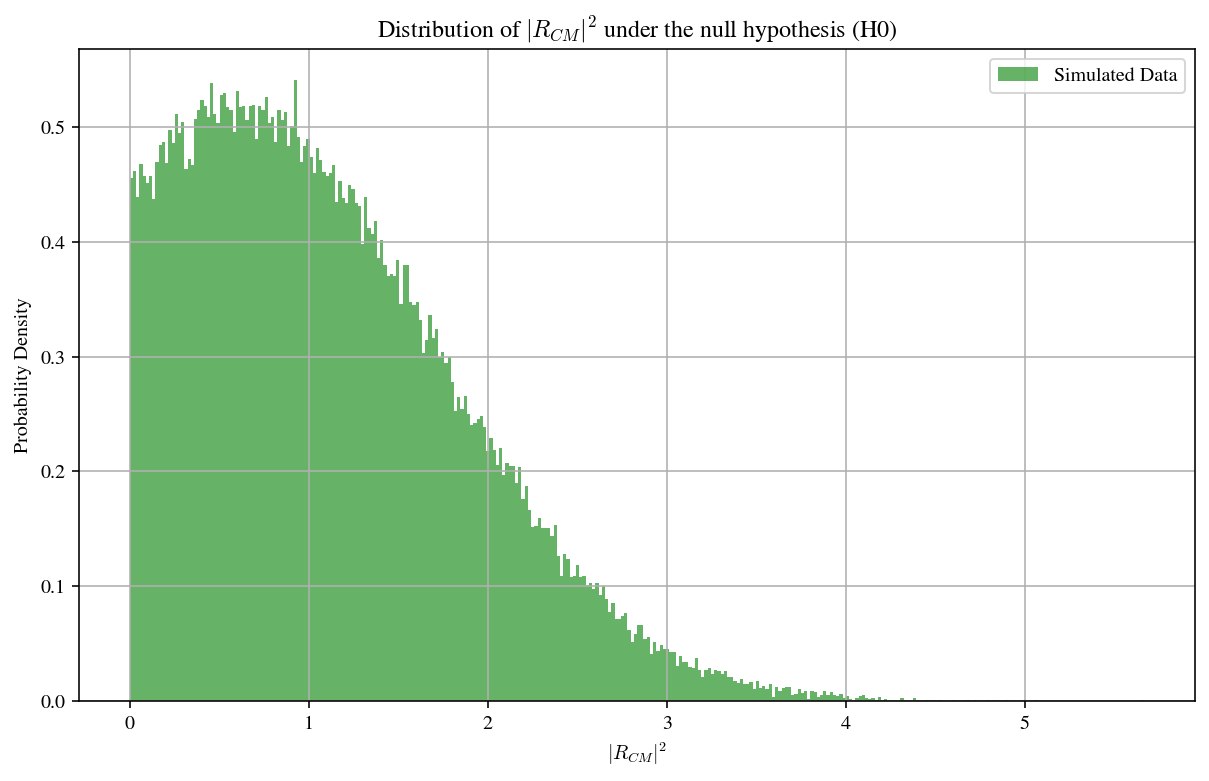

In [5]:
# Fixed constants
# Parameters
d = 2  # Dimension
N = 3 # Number of datasets
L = N*(N-1)/2  # Number of tension vectors
num_samples = int(1e5) # Number of samples

mean_A = np.array([-1/2., 0.]) 
mean_B = np.array([1/2, 0.])
mean_C = np.array([0, np.sqrt(3)/2.])

cov_A = np.array([[0.01, 0.], [0., 0.01]])
cov_B = 100*cov_A.copy()
cov_C = 100*cov_A.copy()

samps_A = np.random.multivariate_normal(mean_A, cov_A, size=10000)
samps_B = np.random.multivariate_normal(mean_B, cov_B, size=10000)
samps_C = np.random.multivariate_normal(mean_C, cov_C, size=10000)

names = ['x', 'y']
labels = ['x', 'y']

chain_A = MCSamples(samples=samps_A, names=names, labels=labels, label='Dataset A')
chain_B = MCSamples(samples=samps_B, names=names, labels=labels, label='Dataset B')
chain_C = MCSamples(samples=samps_C, names=names, labels=labels, label='Dataset C')

colors = ['red', 'blue', 'green']

g = plots.get_subplot_plotter()
g = plots.get_subplot_plotter()
g.triangle_plot([chain_A, chain_B, chain_C],\
                filled=True, contour_args={'alpha':0.5},\
                contour_colors=colors)

output = np.zeros((num_samples))
rand_mean_A = random.multivariate_normal(mean_A, cov_A, num_samples)
rand_mean_B = random.multivariate_normal(mean_B, cov_B, num_samples)
rand_mean_C = random.multivariate_normal(mean_C, cov_C, num_samples)

for i in range(num_samples):

    mean_A = rand_mean_A[i]
    mean_B = rand_mean_B[i]
    mean_C = rand_mean_C[i]

    cov_1 = cov_A + cov_B
    cov_2 = cov_A + cov_C
    cov_3 = cov_B + cov_C
    diff_mean_1 = mean_A - mean_B
    diff_mean_2 = mean_A - mean_C
    diff_mean_3 = mean_B - mean_C

    r_1 = np.dot(sqrtm(np.linalg.inv(cov_1)), diff_mean_1)
    r_2 = np.dot(sqrtm(np.linalg.inv(cov_2)), diff_mean_2)
    r_3 = np.dot(sqrtm(np.linalg.inv(cov_3)), diff_mean_3)

    # Compute some statistic values:
    vectors = np.array([r_1, r_2, r_3])
    R_CM = calculate_R_CM(vectors)
    PTE = gamma(a=d/2, scale=2/L).sf(np.linalg.norm(R_CM)**2)
    n_sigma_beta = np.sqrt(2)*erfcinv(PTE)
    output[i] = n_sigma_beta

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(output, bins=int(np.sqrt(len(output))), density=True, alpha=0.6, color='g', label='Simulated Data')
plt.title('Distribution of $|R_{CM}|^2$ under the null hypothesis (H0)')
plt.xlabel('$|R_{CM}|^2$')
plt.ylabel('Probability Density')
plt.grid(True)
plt.legend()
plt.show()

# Dataset D

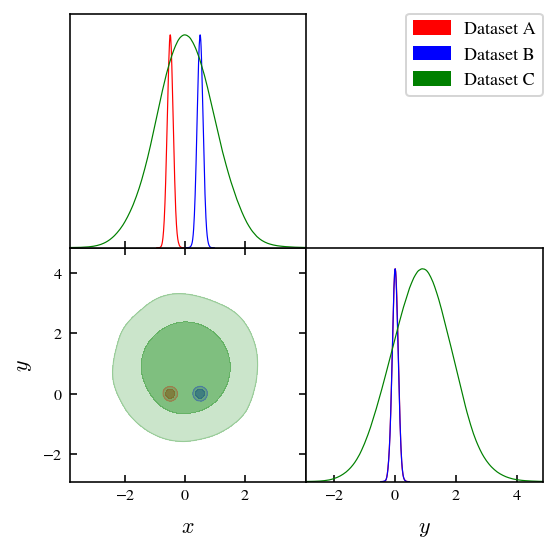

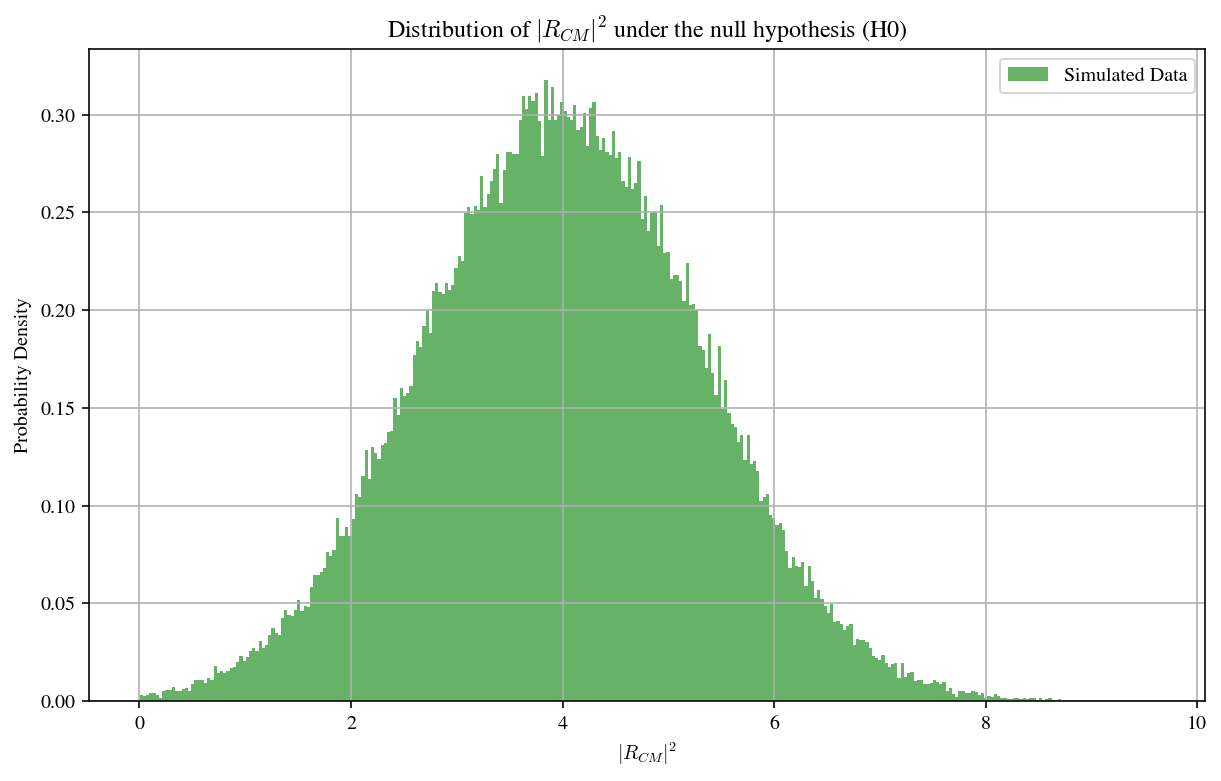

In [6]:
# Fixed constants
# Parameters
d = 2  # Dimension
N = 3  # Number of datasets
L = N*(N-1)/2  # Number of tension vectors
num_samples = int(1e5) # Number of samples

mean_A = np.array([-1/2., 0.]) 
mean_B = np.array([1/2, 0.])
mean_C = np.array([0, np.sqrt(3)/2.])

cov_A = np.array([[0.01, 0.], [0., 0.01]])
cov_B = cov_A.copy()
cov_C = 100*cov_A.copy()

samps_A = np.random.multivariate_normal(mean_A, cov_A, size=10000)
samps_B = np.random.multivariate_normal(mean_B, cov_B, size=10000)
samps_C = np.random.multivariate_normal(mean_C, cov_C, size=10000)

names = ['x', 'y']
labels = ['x', 'y']

chain_A = MCSamples(samples=samps_A, names=names, labels=labels, label='Dataset A')
chain_B = MCSamples(samples=samps_B, names=names, labels=labels, label='Dataset B')
chain_C = MCSamples(samples=samps_C, names=names, labels=labels, label='Dataset C')

colors = ['red', 'blue', 'green']

g = plots.get_subplot_plotter()
g = plots.get_subplot_plotter()
g.triangle_plot([chain_A, chain_B, chain_C],\
                filled=True, contour_args={'alpha':0.5},\
                contour_colors=colors)

output = np.zeros((num_samples))
rand_mean_A = random.multivariate_normal(mean_A, cov_A, num_samples)
rand_mean_B = random.multivariate_normal(mean_B, cov_B, num_samples)
rand_mean_C = random.multivariate_normal(mean_C, cov_C, num_samples)

for i in range(num_samples):

    mean_A = rand_mean_A[i]
    mean_B = rand_mean_B[i]
    mean_C = rand_mean_C[i]

    cov_1 = cov_A + cov_B
    cov_2 = cov_A + cov_C
    cov_3 = cov_B + cov_C
    diff_mean_1 = mean_A - mean_B
    diff_mean_2 = mean_A - mean_C
    diff_mean_3 = mean_B - mean_C

    r_1 = np.dot(sqrtm(np.linalg.inv(cov_1)), diff_mean_1)
    r_2 = np.dot(sqrtm(np.linalg.inv(cov_2)), diff_mean_2)
    r_3 = np.dot(sqrtm(np.linalg.inv(cov_3)), diff_mean_3)

    # Compute some statistic values:
    vectors = np.array([r_1, r_2, r_3])
    R_CM = calculate_R_CM(vectors)
    PTE = gamma(a=d/2, scale=2/L).sf(np.linalg.norm(R_CM)**2)
    n_sigma_beta = np.sqrt(2)*erfcinv(PTE)
    output[i] = n_sigma_beta

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(output, bins=int(np.sqrt(len(output))), density=True, alpha=0.6, color='g', label='Simulated Data')
plt.title('Distribution of $|R_{CM}|^2$ under the null hypothesis (H0)')
plt.xlabel('$|R_{CM}|^2$')
plt.ylabel('Probability Density')
plt.grid(True)
plt.legend()
plt.show()

# Real Data

In [7]:
# Fixed constants
# Parameters
d = 2  # Dimension
N = 4  # Number of datasets
L = N*(N-1)/2  # Number of tension vectors
num_samples = int(1e5) # Number of samples

# Create the two toy chains and the joint chain:
path_git = git.Repo('.', search_parent_directories=True).working_tree_dir
os.chdir(os.path.join(path_git, 'multimeter', 'source'))

'''
A: CC 
B: Planck18 
C: BAO 
D: PPS
'''

chain_A = getdist.mcsamples.loadMCSamples(file_root='lcdm_cc/2023-09-18_1000000_', no_cache=True,settings={'loglikes':True,'label':'CC','ignore_rows': '0.3'})
chain_B = getdist.mcsamples.loadMCSamples(file_root='lcdm_planck/2023-09-16_1000000_', no_cache=True,settings={'loglikes':True,'label':'Planck18','ignore_rows': '0.3'})
chain_C = getdist.mcsamples.loadMCSamples(file_root='lcdm_bao_plus/2024-03-07_1000000_', no_cache=True,settings={'label':'BAO','ignore_rows': '0.3'})
chain_D = getdist.mcsamples.loadMCSamples(file_root='lcdm_pps/2023-09-18_1000000_', no_cache=True,settings={'label':'PPS','ignore_rows': '0.3'})

param_names = ['Omega_m','H0'] #Shared paameters

#Estimate the mean and covariance of the chains:
mean_A = chain_A.mean(param_names)
cov_A = chain_A.cov(param_names)
mean_B = chain_B.mean(param_names)
cov_B = chain_B.cov(param_names)
mean_C = chain_C.mean(param_names)
cov_C = chain_C.cov(param_names)
mean_D = chain_D.mean(param_names)
cov_D = chain_D.cov(param_names)


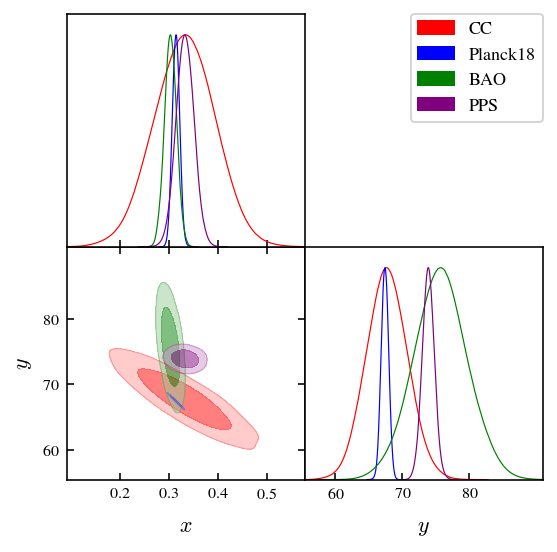

In [8]:
samps_A = np.random.multivariate_normal(mean_A, cov_A, size=10000)
samps_B = np.random.multivariate_normal(mean_B, cov_B, size=10000)
samps_C = np.random.multivariate_normal(mean_C, cov_C, size=10000)
samps_D = np.random.multivariate_normal(mean_D, cov_D, size=10000)

chain_A = MCSamples(samples=samps_A, names=names, labels=labels, label='Dataset A')
chain_B = MCSamples(samples=samps_B, names=names, labels=labels, label='Dataset B')
chain_C = MCSamples(samples=samps_C, names=names, labels=labels, label='Dataset C')
chain_D = MCSamples(samples=samps_D, names=names, labels=labels, label='Dataset D')

colors = ['red', 'blue', 'green', 'purple']


g = plots.get_subplot_plotter()
g.triangle_plot([chain_A, chain_B, chain_C, chain_D],\
                filled=True, contour_args={'alpha':0.5},\
                contour_colors=colors,
                legend_labels=['CC', 'Planck18', 'BAO', 'PPS'])
os.chdir(os.path.join(path_git, 'multimeter', 'source'))
g.export('dist_data.png')

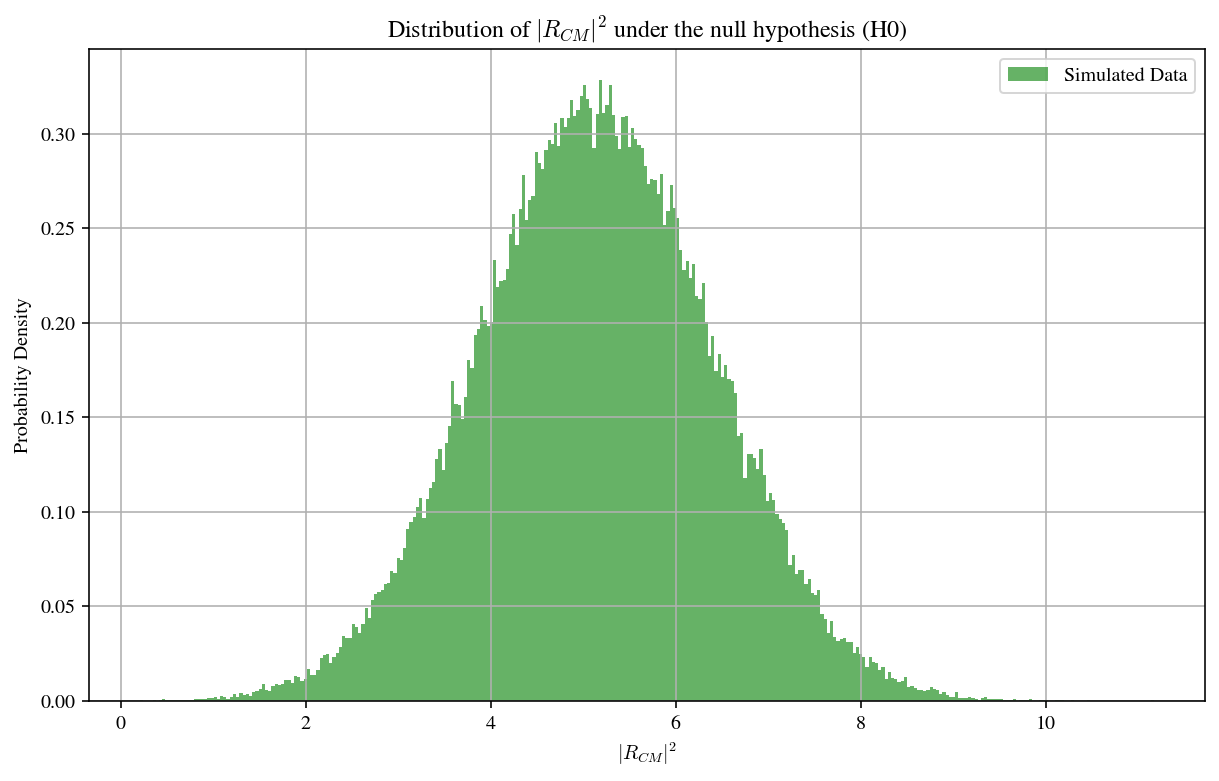

In [9]:
output = np.zeros((num_samples))
rand_mean_A = random.multivariate_normal(mean_A, cov_A, num_samples)
rand_mean_B = random.multivariate_normal(mean_B, cov_B, num_samples)
rand_mean_C = random.multivariate_normal(mean_C, cov_C, num_samples)
rand_mean_D = random.multivariate_normal(mean_D, cov_D, num_samples)

for i in range(num_samples):

    mean_A = rand_mean_A[i]
    mean_B = rand_mean_B[i]
    mean_C = rand_mean_C[i]
    mean_D = rand_mean_D[i]

    cov_1 = cov_A + cov_B
    cov_2 = cov_A + cov_C
    cov_3 = cov_B + cov_C
    cov_4 = cov_A + cov_D
    cov_5 = cov_B + cov_D   
    cov_6 = cov_C + cov_D

    diff_mean_1 = mean_A - mean_B
    diff_mean_2 = mean_A - mean_C
    diff_mean_3 = mean_B - mean_C
    diff_mean_4 = mean_A - mean_D
    diff_mean_5 = mean_B - mean_D
    diff_mean_6 = mean_C - mean_D

    r_1 = np.dot(sqrtm(np.linalg.inv(cov_1)), diff_mean_1)
    r_2 = np.dot(sqrtm(np.linalg.inv(cov_2)), diff_mean_2)
    r_3 = np.dot(sqrtm(np.linalg.inv(cov_3)), diff_mean_3)
    r_4 = np.dot(sqrtm(np.linalg.inv(cov_4)), diff_mean_4)
    r_5 = np.dot(sqrtm(np.linalg.inv(cov_5)), diff_mean_5)
    r_6 = np.dot(sqrtm(np.linalg.inv(cov_6)), diff_mean_6)

    # Compute some statistic values:
    vectors = np.array([r_1, r_2, r_3, r_4, r_5, r_6])
    R_CM = calculate_R_CM(vectors)
    PTE = gamma(a=d/2, scale=2/L).sf(np.linalg.norm(R_CM)**2)
    n_sigma_beta = np.sqrt(2)*erfcinv(PTE)
    output[i] = n_sigma_beta

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(output, bins=int(np.sqrt(len(output))), density=True, alpha=0.6, color='g', label='Simulated Data')
plt.title('Distribution of $|R_{CM}|^2$ under the null hypothesis (H0)')
plt.xlabel('$|R_{CM}|^2$')
plt.ylabel('Probability Density')
plt.grid(True)
plt.legend()
plt.show()